<a href="https://colab.research.google.com/github/crzysab/CoffeShop-SMDB/blob/main/Predict_Temperature_of_Different_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict Temperature of Different Cities using Time Series Analysis  Algorithms**

___

**Analisis Pemanasan Global**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/drive')
global_temp = pd.read_csv("/content/drive/My Drive/dataset/GlobalTemperatures.csv")

Mounted at /content/drive


In [3]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Mendapatkan data tahun
global_temp['dt'][0].split('-')[0]

'1750'

In [5]:
def fetch_year(date):
  return date.split('-')[0]

In [6]:
#Menggunakan fungsi fetch_year ke dalam kolom dt dan membuat kolom baru

global_temp['years']=global_temp['dt'].apply(fetch_year)

In [7]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [8]:
#Mendapatkan Nilai Rata-Rata Pertahun

data = global_temp.groupby('years').agg({'LandAverageTemperature':'mean', 'LandAverageTemperatureUncertainty':'mean'}).reset_index()
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [9]:
data['uncertainty_top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['uncertainty_bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,uncertainty_top,uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [10]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'uncertainty_top', 'uncertainty_bottom'],
      dtype='object')

In [11]:
pip install plotly

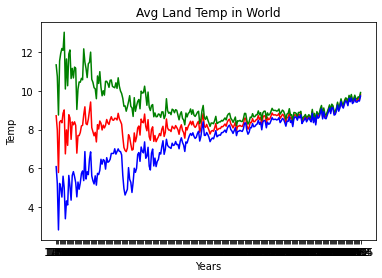

In [12]:
plt.plot(data['years'], data['LandAverageTemperature'], 'r-' )
plt.plot(data['years'], data['uncertainty_top'], 'g-' )
plt.plot(data['years'], data['uncertainty_bottom'], 'b-' )
plt.title('Avg Land Temp in World')
plt.xlabel('Years')
plt.ylabel('Temp')
plt.show()

In [13]:
#fig = px.line(data, x='years', y=['LandAverageTemperature', 'uncertainty_top', 'uncertainty_bottom'], title='Avg Land Temp in World')
fig = px.line(data, x='years', y='LandAverageTemperature', title='Avg Land Temp in World')
#fig = px.line(data, x='years', y='uncertainty_top', title='Avg Land Temp in World')
#fig = px.line(data, x='years', y='uncertainty_bottom', title='Avg Land Temp in World')
fig.show()

**Mengamati Suhu Rata-Rata Setiap Musim**

In [14]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [15]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

In [16]:
#Mengubah tipe data menjadi datetime
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

In [17]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

In [18]:
global_temp['month'] = global_temp['dt'].dt.month

In [19]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [20]:
#Membuat fungsi untuk mendapatkan kategori musim

def get_season(month):
  if month>=3 and month<=5 :
    return 'spring'
  elif month>=6 and month<=8 :
    return 'summer'
  elif month>= 9 and month<=11:
    return 'autumn'
  else:
    return 'winter'

In [21]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [22]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [23]:
spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

In [24]:
years = global_temp['years'].unique()

In [26]:
for year in years:
  current_df = global_temp[global_temp['years']==year]
  spring_temps.append(current_df[current_df['season']=='spring']['LandAverageTemperature'].mean())
  summer_temps.append(current_df[current_df['season']=='summer']['LandAverageTemperature'].mean())
  autumn_temps.append(current_df[current_df['season']=='autumn']['LandAverageTemperature'].mean())
  winter_temps.append(current_df[current_df['season']=='winter']['LandAverageTemperature'].mean())

In [27]:
season = pd.DataFrame()

In [28]:
season['year'] = years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps

In [29]:
season.head()

,year,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [32]:
fig = px.line(season, x='year', y=['spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'])
#fig = px.line(season, x='year', y='winter_temps')
fig.show()